In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import numpy.fft as fft
from scipy import signal as scisig
from viterbi_utils import *
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 500)

In [2]:
df_train = pd.read_pickle('../features/train_clean.pkl')
TARGET = "open_channels"
df_train["group"] = df_train["batch"].astype("str") + "_" + df_train["mini_batch"].astype("str")
df_train["signal_original"] = df_train["signal"].copy()


In [3]:
# mini model
BATCH_GROUP = [5, 10]

df_train = df_train[df_train.batch.isin(BATCH_GROUP)].reset_index(drop=True)
df_train = df_train[df_train.group == "5_5"]

In [4]:
df_train.loc[df_train.open_channels < 1, "open_channels"] = 1
df_train[TARGET] = df_train[TARGET] - 1

In [5]:
def get_noise(batch, col=TARGET, Q=30):
    """
    input: batch df
    output: recovered signal
    """
    signal = batch.signal_original.values
    channels = batch[col].values
    sig_mean = get_mean(batch)
    print(sig_mean)
    sig_noise = Arrange_mean(signal, channels, sig_mean, len(sig_mean))
    
    return sig_noise

In [6]:
noise = get_noise(df_train)

[-4.3292446, -3.0002918, -1.7759126, -0.5259785, 0.70971787, 1.940323, 3.1770709, 4.4048157, 5.6435623, 6.878259]


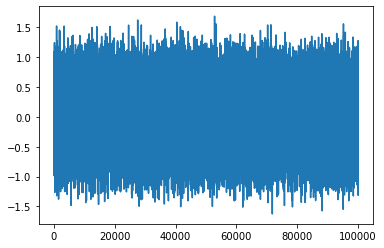

In [7]:
plt.plot(noise)

In [8]:
from scipy import signal
fs = 10000
nperseg = 10000
time = np.arange(len(noise)) / float(fs)

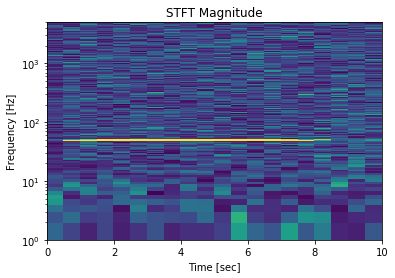

In [9]:
>>> f, t, Zxx = signal.stft(noise, fs=fs, nperseg=nperseg)
>>> plt.figure()
>>> plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=0.02)
>>> plt.ylim([f[1], f[-1]])
>>> plt.title('STFT Magnitude')
>>> plt.ylabel('Frequency [Hz]')
>>> plt.xlabel('Time [sec]')
>>> plt.yscale('log')
>>> plt.show()

In [10]:
# Zxx.shape
# plt.plot(np.abs(Zxx)[:,60][:100])

In [11]:
scaler = 0.01
# Zxx[49:52,:] = Zxx[49:52,:] * 0.02 
# Zxx[349:352,:] = Zxx[349:352,:] * scaler
Zxx[1047:1052,:] = Zxx[1047:1052,:] * scaler
Zxx[1147:1152,:] = Zxx[1147:1152,:] * scaler
Zxx[1247:1252,:] = Zxx[1247:1252,:] * scaler
Zxx[1447:1452,:] = Zxx[1447:1452,:] * scaler
Zxx[1547:1552,:] = Zxx[1547:1552,:] * scaler

_, xrec = signal.istft(Zxx, fs)

In [12]:
# Zxx[1047:1052,:] = Zxx[1047:1052,:] * scaler
# Zxx[1147:1152,:] = Zxx[1147:1152,:] * scaler
# Zxx[1247:1252,:] = Zxx[1247:1252,:] * scaler
# Zxx[1447:1452,:] = Zxx[1447:1452,:] * scaler
# Zxx[1547:1552,:] = Zxx[1547:1552,:] * scaler

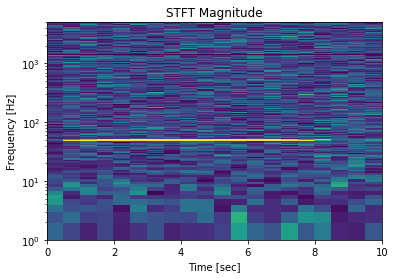

In [13]:
# >>> f, t, Zxx = signal.stft(noise, fs=fs, nperseg=nperseg)
>>> plt.figure()
>>> plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=0.02)
>>> plt.ylim([f[1], f[-1]])
>>> plt.title('STFT Magnitude')
>>> plt.ylabel('Frequency [Hz]')
>>> plt.xlabel('Time [sec]')
>>> plt.yscale('log')
>>> plt.show()

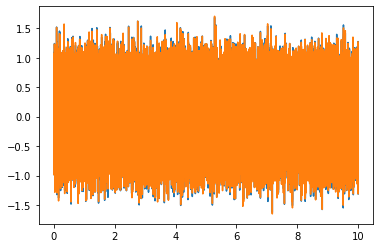

In [14]:
>>> plt.figure()
>>> plt.plot(time, noise, time, xrec,)
>>> plt.show()

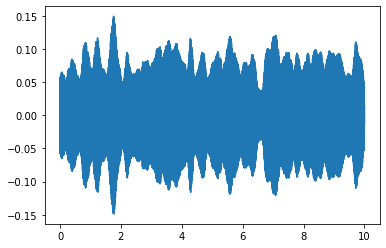

In [15]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

plt.figure()
plt.plot(time, noise-xrec)
# plt.plot(moving_average(noise-xrec, 100))
plt.show()

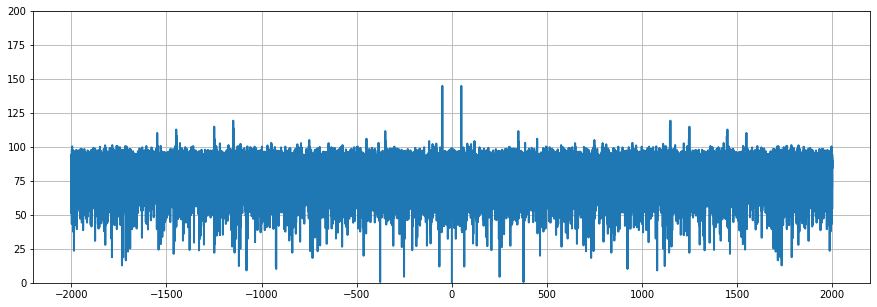

In [16]:
fig = plt.figure(figsize=(15,5))

fs=10000
fft = np.fft.fft(noise)
psd = np.abs(fft) ** 2
fftfreq = np.fft.fftfreq(len(psd),1/fs)

i = abs(fftfreq) < 2000
plt.grid()
plt.plot(fftfreq[i], 20*np.log10(psd[i]), linewidth=2)
plt.ylim([0,200])
plt.show()


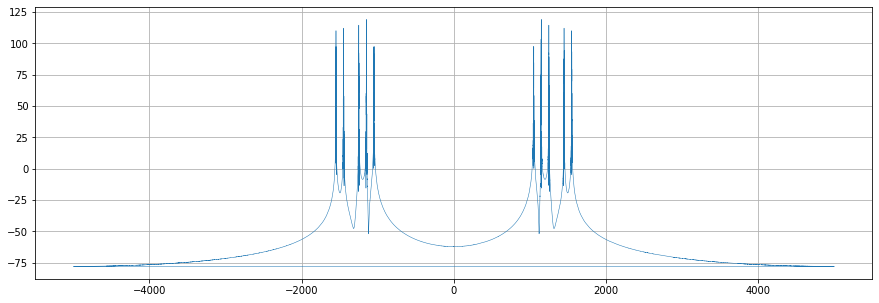

In [17]:
fig = plt.figure(figsize=(15,5))

fs=10000
fft = np.fft.fft(noise-xrec)
psd = np.abs(fft) ** 2
fftfreq = np.fft.fftfreq(len(psd),1/fs)

i = abs(fftfreq) < 5000
plt.grid()
plt.plot(fftfreq[i], 20*np.log10(psd[i]), linewidth=.5)

plt.show()


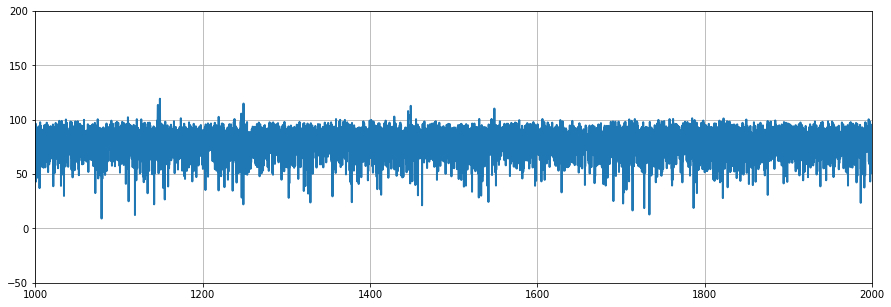

In [18]:
fig = plt.figure(figsize=(15,5))

fs=10000
fft = np.fft.fft(noise)
psd = np.abs(fft) ** 2
fftfreq = np.fft.fftfreq(len(psd),1/fs)

i = abs(fftfreq) < 5000
plt.grid()
plt.plot(fftfreq[i], 20*np.log10(psd[i]), linewidth=2)
plt.xlim([1000, 2000])
plt.ylim([-50,200])
plt.show()


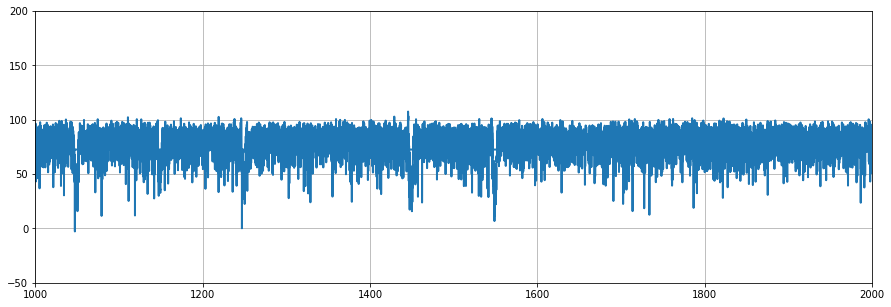

In [19]:
fig = plt.figure(figsize=(15,5))

fs=10000
fft = np.fft.fft(xrec)
psd = np.abs(fft) ** 2
fftfreq = np.fft.fftfreq(len(psd),1/fs)

i = abs(fftfreq) < 5000
plt.grid()
plt.plot(fftfreq[i], 20*np.log10(psd[i]), linewidth=2)
plt.xlim([1000, 2000])
plt.ylim([-50,200])
plt.show()
